In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
import matplotlib.cm as cm
from sklearn import svm
from sklearn.metrics.cluster import v_measure_score

In [132]:
df = pd.read_csv('http://cs.joensuu.fi/sipu/datasets/s1.txt', names=['x','y'], delimiter=r"\s+")
df

,x,y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046
...,...,...
4995,665426,853940
4996,691827,863963
4997,650661,861267
4998,599647,858702


In [133]:
location = df.values
X = location[:,0]
Y = location[:,1]
X = X.reshape(len(X),1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train)

[[618053]
 [480787]
 [107965]
 ...
 [221706]
 [112184]
 [347079]]


find k here

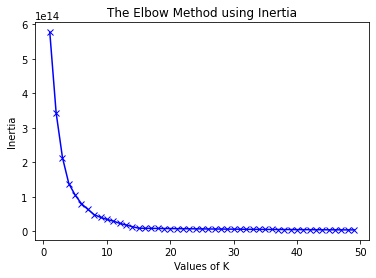

In [134]:
# k_range = int(range(100))
inertias = [] 
mapping = {} 
for k in range(1,50):
    kmeans = KMeans(n_clusters=k).fit(df)
    inertias.append(kmeans.inertia_) 
plt.plot(range(1,50), inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

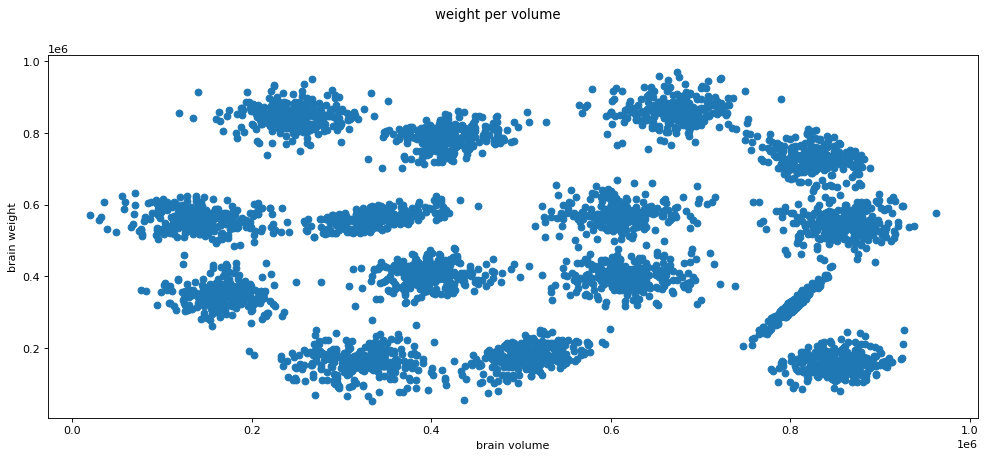

In [135]:
fig = plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('weight per volume')
plt.plot(df['x'], df['y'],'o')
plt.xlabel('brain volume', fontsize=10)
plt.ylabel('brain weight', fontsize=10)
plt.show()

In [136]:
def frac(df, fraction):
    return df.sample(frac=fraction)
train = frac(df, 0.8)
test = df.merge(train, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']

In [146]:
kmeans = KMeans(n_clusters=15).fit(train.iloc[:,:2])
train['city'] = kmeans.labels_
train

,x,y,city
1721,289087,565427,7
2355,610698,396326,0
4748,682510,905902,11
900,394912,755947,1
2581,283576,809069,13
...,...,...,...
79,583728,563146,9
1460,850533,160136,4
3248,275459,190178,8
92,611044,571814,9


For n_clusters = 5 The average silhouette_score is : 0.4642909313080935
For n_clusters = 10 The average silhouette_score is : 0.6028432761683923
For n_clusters = 12 The average silhouette_score is : 0.621645599699561
For n_clusters = 15 The average silhouette_score is : 0.71196328954743
For n_clusters = 20 The average silhouette_score is : 0.5776019408798221


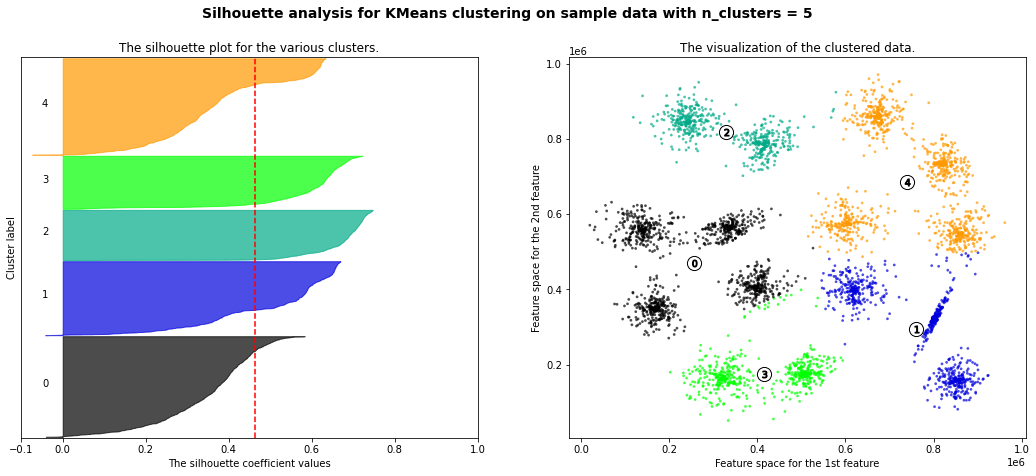

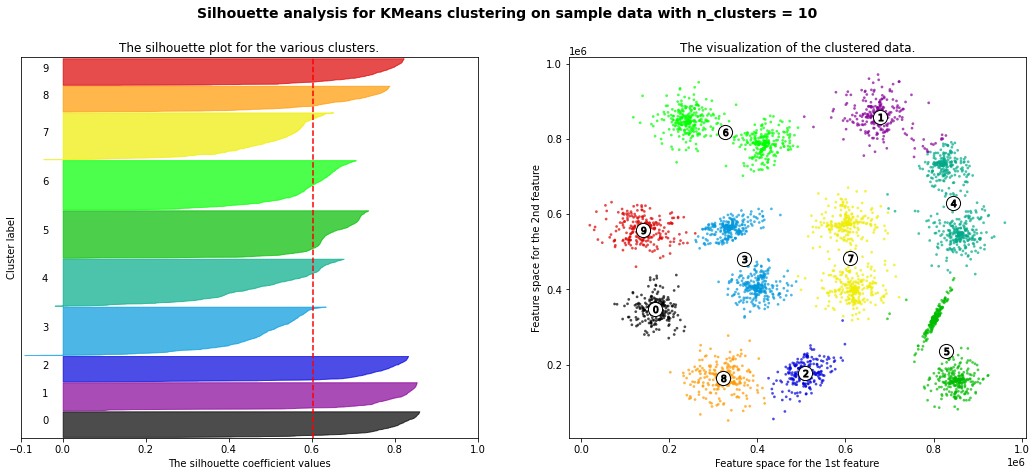

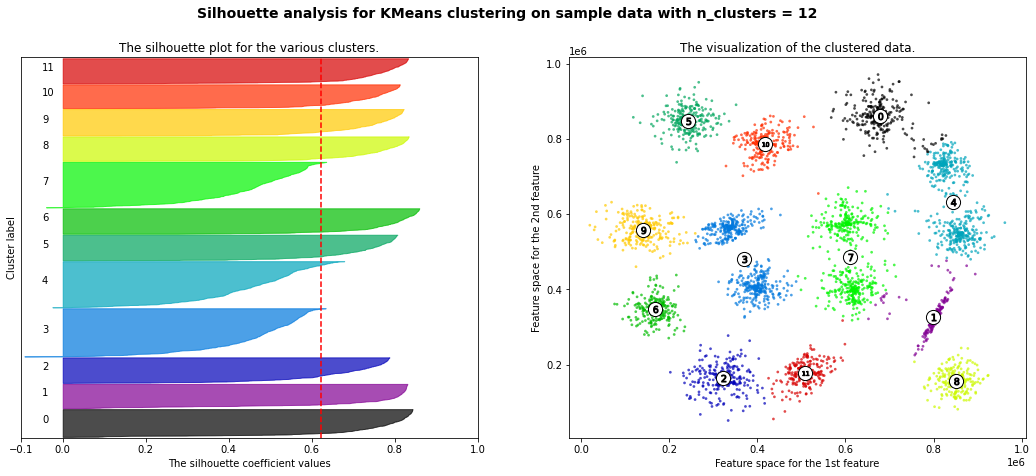

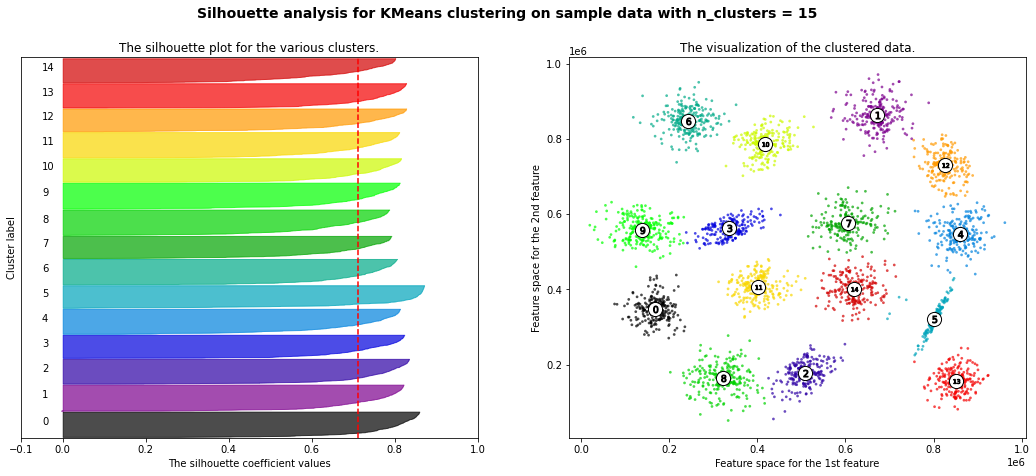

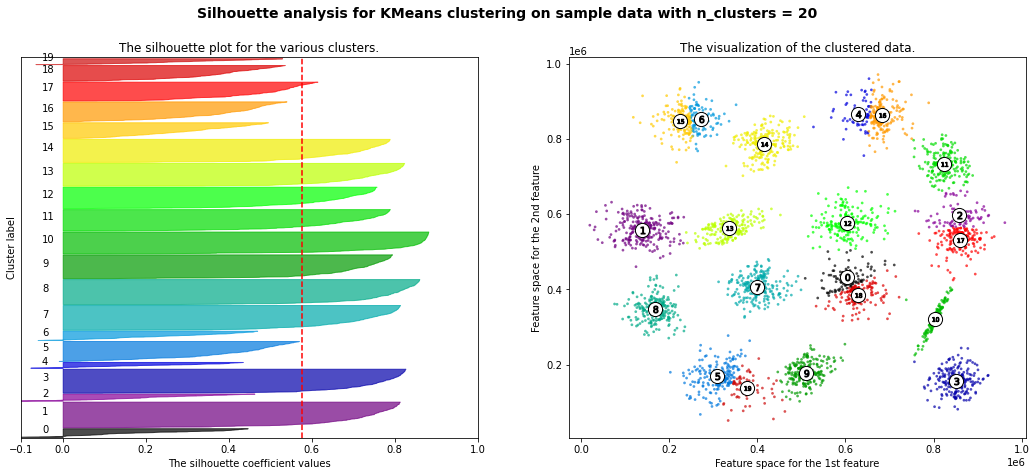

In [138]:
range_n_clusters = [5, 10, 12, 15, 20]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, 4000 + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(train)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(train, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(train.iloc[:, 0], train.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [150]:
clf = svm.SVC()
clf.fit(train.iloc[:,:2], train.iloc[:,2])

SVC()

In [153]:
my_result = clf.predict(test.iloc[:,:2])
cluster_ans = kmeans.predict(test.iloc[:,:2])
v_measure_score(my_result, cluster_ans)

0.9961711173510596